### Hate Speech detection using Transformers (Deep Learning)

#### This Project is actually about the concept of "hate speech", which we frequently encounter today and witness on social media. With the invention of the Internet, people all over the world can communicate. Although some people like the photos , videos and ideas we share , some people also criticize heavily . In this project, I will evaluate many positive or negative tweets shared on Twitter, a social media platform, and create a model through this evaluation. Although this is a project topic , I would like to remind you how easy it is to criticize people and break the hearts of people we do not know today . Before we criticize, we should consider how other people might feel. A better world is possible <3.

## Introduction to Project

<img src="hatespc.jpg" alt="Alternative text" />

## Problem Statement

#### The term hate speech is understood as any type of verbal, written or behavioural communication that attacks or uses derogatory or discriminatory language against a person or group based on what they are, in other words, based on their religion, ethnicity, nationality, race, colour, ancestry, sex or another identity factor. In this problem, We will design a hate speech detection model with Machine Learning and Python.

#### Hate Speech Detection is generally a task of sentiment classification. So for training, a model that can classify hate speech from a certain piece of text can be achieved by training it on a data that is generally used to classify sentiments. So for the task of hate speech detection model, We will use the Twitter tweets to identify tweets containing  Hate speech.

## Examine and Get to Know the Dataset

In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import random
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv("train_E6oV3lV.csv")

In [73]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [74]:
df = df.drop('id', axis=1)

# removing unnecessary id label from dataframe , i am not going to use it.

In [75]:
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [76]:
df.shape

(31962, 2)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [78]:
df.isna().sum()
#There is no empty cell in our dataset , great!!

label    0
tweet    0
dtype: int64

In [79]:
free_s = 0
hate_s = 0

for elm in df["label"]:
    if elm == 0:
        free_s += 1
    else:
        hate_s += 1


print("free : {}".format(free_s))
print("hate : {}".format(hate_s))

# The numbers of free and hate speech tweets in our dataframe.

free : 29720
hate : 2242


In [80]:
# The number of free speech is a lot bigger than hate speech tweets , for our model it could be bad because of there is not enough
# data for hatespeech maybe.

Free Speech Percentage : %92.98542018647143
Hate Speech Percentage : %7.014579813528565


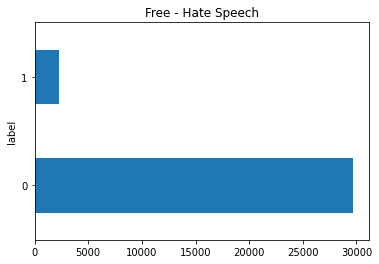

In [81]:
df["label"].value_counts().plot.barh().set_title("Free - Hate Speech")

print("Free Speech Percentage : %{}".format((free_s / df["label"].size) * 100))
print("Hate Speech Percentage : %{}".format((hate_s / df["label"].size) * 100))

In [82]:
# The percentage difference between two values is so remarkable.

#### As we have seen above , the dataset does not contain any blank information . When we examine the data set, we can see that most of the data it contains comes from "Free Speech". When we examine the tweets contained in the dataset, we see that a preprocessing is required, too many unnecessary characters etc. We can easily see what it contains.

## *** Preprocessing ***

<img src="data_pre.png" alt="Alternative text" />

In [83]:
# Lets see what our tweets looks like.

In [84]:
df["tweet"].iloc[0]

' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run'

In [85]:
#### Cleaning the Text

##### In this part , I removed the characters that placed in the tweets and apply the "lowercase" method . I used regex operation to remove special characters like "#,@" and unnecessary blanks.

In [86]:
def preprocess_tweet(tweet):
    tweet = tweet.lower()                                                          #lowering
    tweet = ''.join([char for char in tweet if char not in string.punctuation])    #removing punctution.
    tweet = re.sub(r'http\S+|www\S+|@[^\s]+', '', tweet)                           #removing URLs
    tweet = re.sub(r'\s+', ' ', tweet).strip()                                     #removing unnecessary blanks
    tweet = ' '.join(char for char in tweet.split() if char.isalnum())             #removing any remaining punctuations and special chars
    return tweet

# Apply preprocessing to the 'text' column
df["tweet"] = df["tweet"].apply(preprocess_tweet)

for number in range(10):
    x = random.randint(1,1000)
    print("random number {} : {}".format(x,df["tweet"].iloc[x])) #printing random values so we can see if is there any uncleaned tweets left.

random number 410 : dude im a tiger roar tiger annaswelshzoo bihdaycelebrations
random number 373 : suppoing family god chivalry tradition and pride in ones heritage is now controversial
random number 768 : user weddings are impoant because they celebrate life and possibility hathaway wedding love
random number 821 : user user gutted didnt know that you were here tonight i would have been there good luck
random number 286 : maybe 4 happy hour you can get a ending
random number 909 : my morning office routine will never be the same without my bff imy
random number 147 : just found out user is at user after id been exclaiming to user how gr8 blains hair was the other nite
random number 481 : when quay collab with user says sold noooo whyyyy loveyoudesi
random number 697 : natureperfection bull hill climb you have to reach the target to complete the task to survive with str
random number 129 : user driver hit female moose on river rd weston moose was killed driver is ok crews removing ani

##### Preprocessing

In [87]:
from wordcloud import WordCloud
from collections import Counter

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\deniz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deniz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\deniz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
def tokenize_text(text):
    return word_tokenize(text)                                   #Tokenizing words ->

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]   # -> putting into tokenized words and removing words that placed in 'stop_words'. ->

def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]       # -> applying lemmatization. ->

In [89]:
df["tweet"] = df["tweet"].apply(tokenize_text)
df["tweet"] = df['tweet'].apply(remove_stopwords)
df["tweet"] = df['tweet'].apply(lemmatize_tokens)

In [90]:
df.head() # Lets check out.

,label,tweet
0,0,"[user, father, dysfunctional, selfish, drag, k..."
1,0,"[user, user, thanks, lyft, credit, cant, use, ..."
2,0,"[bihday, majesty]"
3,0,"[model, love, u, take, u, time]"
4,0,"[factsguide, society, motivation]"


In [91]:
df["tweet"].iloc[435] # A random data from dataset.

['brexit',
 'angst',
 'factor',
 'helping',
 'drive',
 'interest',
 'rate',
 'germany',
 'japan',
 'bbh',
 'blog',
 'silver',
 'gold']

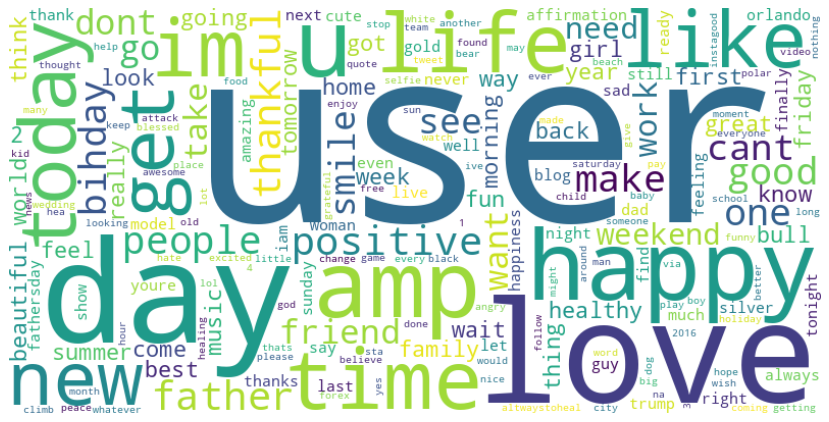

In [92]:
all_tokens = [token for tokens_list in df['tweet'] for token in tokens_list]
word_freq = Counter(all_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show() # visualizing Wordcloud.

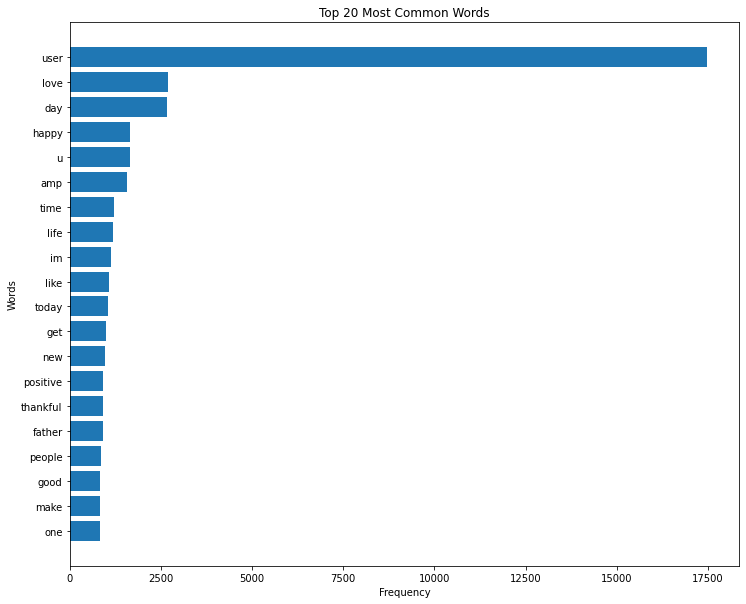

In [93]:
most_common_words = word_freq.most_common(20)
words, frequencies = zip(*most_common_words)

plt.figure(figsize=(12, 10))
plt.barh(words, frequencies)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words')
plt.gca().invert_yaxis()
plt.show() # Most used words in our dataset.

In [94]:
i = 0
x = 0
for sen in df["tweet"]:
    x += len(sen)
    if len(sen) > i:
        i = len(sen)

print("max len : " , i)
print("avg len : " , x/len(df))

# The max and avg lengths of the sentences 

max len :  24
avg len :  8.284462799574495


#### 

In [95]:
from sklearn.utils import shuffle
# Assuming you have an existing DataFrame called 'original_df'
# Create a new DataFrame with rows where 'label' is equal to 1
df_hate = df[df['label'] == 1].copy()
df_free = df[df["label"] == 0].copy()

# If you want to reset the index of the new DataFrame
df_hate.reset_index(drop=True, inplace=True)
df_free.reset_index(drop=True, inplace=True)

df_new = pd.concat([df_hate, df_free.head(7758)], ignore_index=True)

# Shuffle the concatenated DataFrame
df_new = shuffle(df_new, random_state=42)

df_new.reset_index(drop=True, inplace=True)

#print(df_new.info)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   10000 non-null  int64 
 1   tweet   10000 non-null  object
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [96]:
df_h = pd.read_csv("hate_speech.csv")

df_h.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1574 non-null   int64 
 1   tweet   1574 non-null   object
dtypes: int64(1), object(1)
memory usage: 24.7+ KB


In [97]:
df_h["tweet"] = df_h["tweet"].apply(preprocess_tweet)
df_h["tweet"] = df_h["tweet"].apply(tokenize_text)
df_h["tweet"] = df_h['tweet'].apply(remove_stopwords)
df_h["tweet"] = df_h['tweet'].apply(lemmatize_tokens)

In [98]:
df_h.iloc[0].tweet

['rt',
 'infidelalie',
 'yay',
 'america',
 'amp',
 'israel',
 'put',
 'jew',
 'hating',
 'muslim',
 'trash',
 'government',
 'pathetic',
 'amp',
 'sickening']

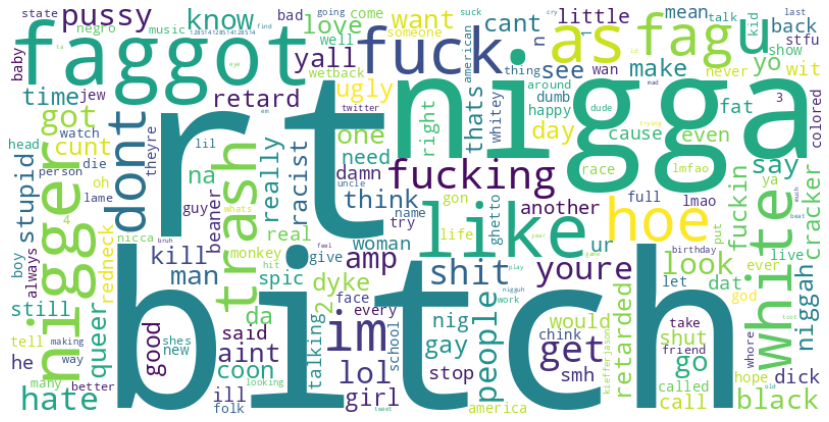

In [147]:
all_tokens = [token for tokens_list in df_h['tweet'] for token in tokens_list]
word_freq = Counter(all_tokens)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [99]:
df = pd.concat([df_h, df_new], ignore_index=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11574 entries, 0 to 11573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   11574 non-null  int64 
 1   tweet   11574 non-null  object
dtypes: int64(1), object(1)
memory usage: 181.0+ KB


Text(0.5, 1.0, 'Free - Hate Speech')

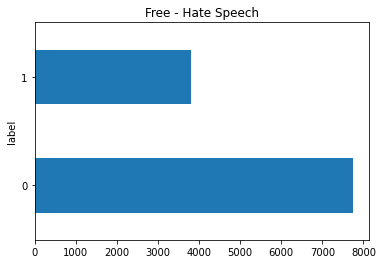

In [100]:
df["label"].value_counts().plot.barh().set_title("Free - Hate Speech")

#### Modeling Part using Transformers

In [101]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils import shuffle

In [102]:
class HateSpeechDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=128):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = str(self.data.iloc[idx]['tweet'])
        label = int(self.data.iloc[idx]['label'])

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

In [103]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

print("tokenizer and model defined...")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer and model defined...


In [109]:
train_dataset = HateSpeechDataset(train_data, tokenizer)
test_dataset = HateSpeechDataset(test_data, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

In [110]:
# Define training parameters
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.CrossEntropyLoss()

In [111]:
epochs = 3

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)
print("...")

...


In [113]:
from tqdm.auto import tqdm

num_training_steps = epochs * len(train_loader)

progress_bar = tqdm(range(num_training_steps))

for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()

        outputs = model(input_ids, attention_mask=attention_mask)
        loss = criterion(outputs.logits, labels)

        loss.backward()
        
        optimizer.step()
        progress_bar.update(1)

  0%|          | 0/3474 [00:00<?, ?it/s]

In [114]:
model.eval()
predictions = []
true_labels = []

for batch in test_loader:
    input_ids = batch['input_ids'].to(device)
    attention_mask = batch['attention_mask'].to(device)
    labels = batch['label'].to(device)

    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    predictions.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
    true_labels.extend(labels.cpu().numpy())

In [149]:
accuracy = accuracy_score(true_labels, predictions)
report = classification_report(true_labels, predictions, target_names=['Free', 'Hate'])

print(f'Accuracy: {accuracy}')
print("---------------------------")
print(report)

Accuracy: 0.923110151187905
---------------------------
              precision    recall  f1-score   support

        Free       0.94      0.94      0.94      1516
        Hate       0.89      0.89      0.89       799

    accuracy                           0.92      2315
   macro avg       0.91      0.92      0.92      2315
weighted avg       0.92      0.92      0.92      2315



0 - 0 -> Predicted Trues that they are actual Trues
0 - 1 -> Predicted Trues that they are actual Falses
1 - 0 -> Predicted Falses that they are actual Trues
1 - 1 -> Predicted Falses that they are actual Falses


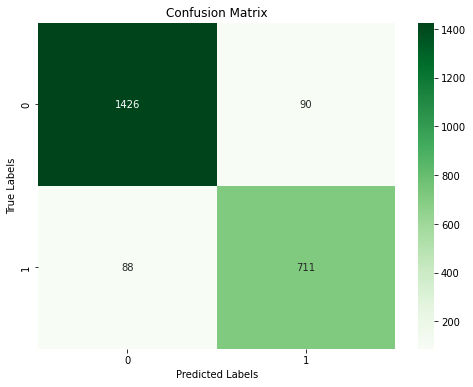

In [135]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(true_labels, predictions)

def plot_confusion_matrix(confusion_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Define your class labels if they are binary (0 and 1), or replace with actual class labels.
class_labels = ["0", "1"]

print("0 - 0 -> Predicted Trues that they are actual Trues")
print("0 - 1 -> Predicted Trues that they are actual Falses")
print("1 - 0 -> Predicted Falses that they are actual Trues")
print("1 - 1 -> Predicted Falses that they are actual Falses")

plot_confusion_matrix(confusion, class_labels)

In [106]:
#Dumping Model to Pickle

In [ ]:
import pickle

pytorch_m = open("model.pkl","wb")
pickle.dump(model, pytorch_m)
pytorch_m.close()

In [ ]:
#Exctracking it

In [107]:
model = open("model.pkl","rb")           
model = pickle.load(model)

In [143]:
#The whole function which is what we do in our code actually. First pre-pre-tokenizing uzing regex ,
# nltk tokenizer , stop-words and lemmatization . then tokeniing and pre-pro using Bert. Then generating
# prediction using our trained model and print result.

In [144]:
def classify_text(text):
    #my pretokenizing 
    text_ = preprocess_tweet(text)
    text_ = tokenize_text(text_)
    text_ = remove_stopwords(text_)
    text_ = lemmatize_tokens(text_)
    text_ = str(text_)

    #Tokenizing with Bert the input text
    inputs = tokenizer(text_, return_tensors='pt', truncation=True, padding=True)
   
    #Controlling the model is on the correct device
    inputs.to(device)
    
    #Perform inference
    with torch.no_grad():
        outputs = model(**inputs)
    
    #predicted label (0 for "Free" and 1 for "Hate")
    predicted_label = torch.argmax(outputs.logits, dim=1).item()
    
    return predicted_label

In [145]:
#input that isn't placed in our dataset.

input_text = "i love my family. They are so supportive #family"
predicted_label = classify_text(input_text)

if predicted_label == 1:
    print("The input contains hate speech.")
else:
    print("The input does not contain hate speech.")

The input does not contain hate speech.


In [146]:
#input from another dataset which is not in out trained dataset.

input_text = "@user another extremist suppoing #violence  #discrimination blindly suppoing #apaheidisrael. is it a must for #cpc 2 b nuts"
predicted_label = classify_text(input_text)

if predicted_label == 1:
    print("The input contains hate speech.")
else:
    print("The input does not contain hate speech.")

The input contains hate speech.
